In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans

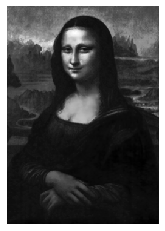

In [2]:
mona = plt.imread('mona_lisa.png')
plt.axis('off')
plt.imshow(mona, cmap='gray')

Text(0, 0.5, 'Pixels')

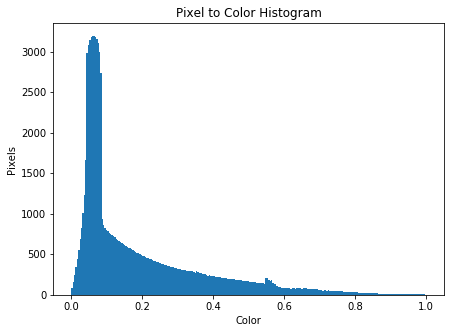

In [3]:
plt.figure(figsize=(7,17))
plt.subplot(3,1,1)
image_data = np.reshape(mona, 360*250, 1)
histogram = plt.hist(image_data, bins = 256)
plt.title("Pixel to Color Histogram")
plt.xlabel("Color")
plt.ylabel("Pixels")

In [4]:
mona2 = np.sort(image_data)
mona2[60000]

0.19607843

(-0.5, 249.5, 359.5, -0.5)

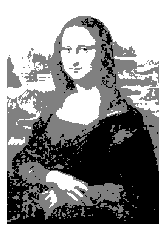

In [5]:
masks = np.ones_like(mona)*0.5
masks[mona < mona2[30000]] = 0
masks[mona > mona2[60000]] = 1
plt.imshow(masks, cmap='gray')
plt.axis('off')

In [6]:
centroid, energy = kmeans(image_data, 8)

(-0.5, 249.5, 359.5, -0.5)

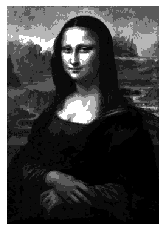

In [7]:
new_mona=np.zeros_like(mona)
for i in range(mona.shape[0]):
    for j in range(mona.shape[1]):
        pixel=mona[i,j]
        distance = np.abs(pixel - centroid)
        new_mona[i,j]= centroid[np.argmin(distance)]
plt.imshow(new_mona, cmap='gray')
plt.axis('off')

In [8]:
new_mona_sorted = np.sort(new_mona)

In [9]:
new_new_mona = np.ones_like(new_mona)
for i in range(new_mona.shape[0]):
    for j in range(new_mona.shape[1]):
        pixel = new_mona[i,j]
        if pixel < 0.6:
            new_new_mona[i,j] = pixel*2

(-0.5, 249.5, 359.5, -0.5)

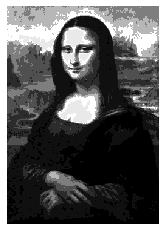

In [10]:
new_new_mona
plt.imshow(new_new_mona, cmap='gray')
plt.axis('off')

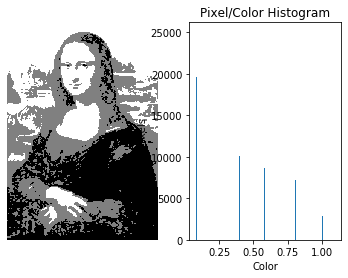

In [11]:
image_data2 = np.reshape(new_new_mona, 360*250, 1)
mona3 = np.sort(image_data2)
mona3[60000]
masks = np.ones_like(new_new_mona)*0.5
masks[mona < mona2[30000]] = 0
masks[mona > mona2[60000]] = 1
plt.subplot(1,2,1)
plt.imshow(masks, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.hist(image_data2, bins = 256)
plt.title("Pixel/Color Histogram")
plt.xlabel("Color")
plt.ylabel("Pixels")

plt.show()

# Question #2

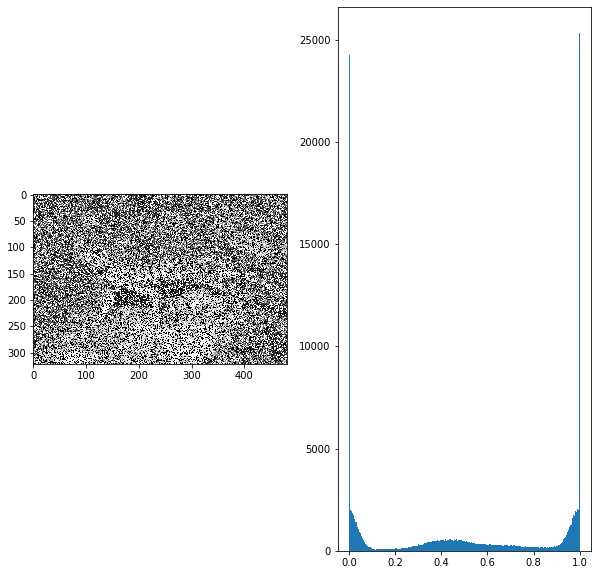

In [90]:
lizard = plt.imread('lizard_noisy.png')
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(lizard, cmap='gray')
plt.subplot(1,2,2)
lizard11 = np.reshape(lizard, 321*481, 1)
histogram = plt.hist(lizard11, bins = 256)

In [54]:
lizard.shape

(321, 481)

In [55]:
m, n = lizard.shape

In [56]:
lizard2 = lizard.copy()
for i in range(1, m-1):
    for j in range(1, n-1):
        lizard2[i,j] = np.average(lizard[i-1:i+2,j-1:j+2])

In [59]:
lizard3 = lizard2.copy()
for i in range(1, m-1):
    for j in range(1, n-1):
        lizard3[i,j] = np.average(lizard2[i-1:i+2,j-1:j+2])

In [64]:
lizard4 = lizard.copy()
for i in range(1, m-1):
    for j in range(1, n-1):
        lizard4[i,j] = np.median(lizard[i-1:i+2,j-1:j+2])

In [67]:
lizard5 = lizard4.copy()
for i in range(2, m-1):
    for j in range(2, n-1):
        lizard5[i,j] = np.median(lizard4[i-1:i+2,j-1:j+2])

Text(0.5, 1.0, 'Median. Second Implementation')

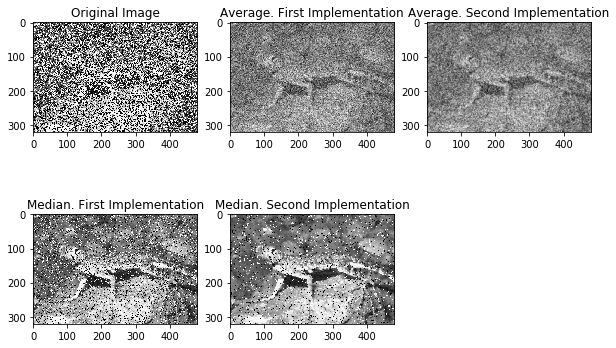

In [89]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.imshow(lizard, cmap='gray')
plt.title("Original Image")
plt.subplot(3,3,2)
plt.imshow(lizard2, cmap='gray')
plt.title("Average. First Implementation")
plt.subplot(3,3,3)
plt.imshow(lizard3, cmap='gray')
plt.title("Average. Second Implementation")
plt.subplot(3,3,4)
plt.imshow(lizard4, cmap='gray')
plt.title("Median. First Implementation")
plt.subplot(3,3,5)
plt.imshow(lizard5, cmap='gray')
plt.title("Median. Second Implementation")

In [28]:
#Mean
#The image becomes clearer and we can see that there's animal; the animal is a lizard. -> First Time
#Running the algorithm a second time on the image, it does not improve the previous image. -> Second Time

In [ ]:
#Average
#The image did improve quite a bit. There isn't much noise on the image
#Running the algorithm one more time the new denoised image, the picture begins to take form.

# Question 3

(-0.5, 320.5, 480.5, -0.5)

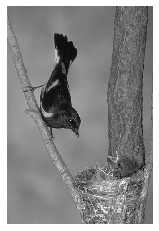

In [29]:
bird = plt.imread('bird.png')
plt.imshow(bird, cmap='gray')
plt.axis('off')

(-0.5, 320.5, 480.5, -0.5)

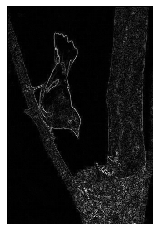

In [30]:
m,n = bird.shape
bird2 = bird
e = np.zeros_like(bird)
e[2:m-1,2:n-1] = np.abs(bird2[3:m,2:n-1] - bird2[1:m-2,2:n-1])+ np.abs(bird2[2:m-1,3:n]-bird2[2:m-1,1:n-2])
emin = np.min(np.min(e))
emax = np.max(np.max(e))
e = np.round(255*(e-emin)/(emax-emin))
plt.imshow(e, cmap='gray')
plt.axis('off')

(-0.5, 320.5, 480.5, -0.5)

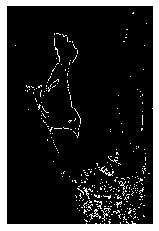

In [31]:
thresh = 70;
e = 255*(thresh < e);
plt.imshow(e, cmap = 'gray')
plt.axis('off')

# Question 4

(-0.5, 3071.5, 2303.5, -0.5)

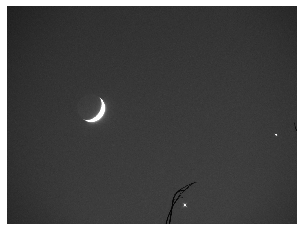

In [32]:
conjunction = plt.imread('conjunction_gray.png')
plt.imshow(conjunction, cmap='gray')
plt.axis('off')

In [33]:
width, height = conjunction.shape

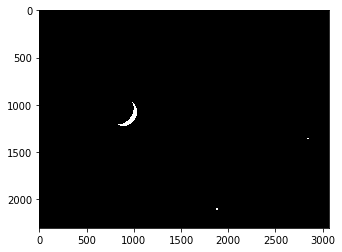

In [34]:
threshold = 0.8
conjunction_img =  np.array(conjunction, dtype=int)
for i in range(width):
    for j in range(height):
        pixel = conjunction[i,j]
        if pixel <= threshold:
            conjunction_img[i,j] = 0
        else:
            conjunction_img[i,j] = 1
plt.imshow(conjunction_img, cmap='gray')

In [35]:
def conj(conjunction2):
    row, column = conjunction2.shape
    L = 0;
    conjunction3 = np.array(conjunction2, dtype=int) #P
    conjunction_copy = np.array(np.zeros_like(conjunction2), dtype=int) #LABEL
    for i in range(0, row-1):
        for j in range(0, column-1):
            pixel = conjunction3[i,j]
            if pixel == 0:
                conjunction_copy[i,j] = 0;
            elif conjunction3[i,j-1] == 0  and conjunction3[i-1,j] == 0:
                L = L+1
                conjunction_copy[i,j] = L;
            elif conjunction3[i,j-1] == 0:
                conjunction_copy[i,j] = conjunction_copy[i-1,j]
            elif conjunction2[i-1,j] == 0:
                conjunction_copy[i,j] = conjunction_copy[i][j-1];
            else:
                if conjunction_copy[i,j-1] < conjunction_copy[i-1,j]:
                     conjunction_copy[i,j] = conjunction_copy[i,j-1];
                else:
                    conjunction_copy[i,j] = conjunction_copy[i-1,j]
                    
    index = np.arange(0,L+1, dtype=int)
    for i in range(1,row-1):
        for j in range(1, row-1):
            list_hold = [conjunction_copy[i,j]] 
            if conjunction_copy[i,j] != 0:
                list_hold.append(conjunction_copy[i,j])
            if conjunction_copy[i,j+1] != 0:
                list_hold.append(conjunction_copy[i,j+1])
            if conjunction_copy[i+1,j] != 0:
                list_hold.append(conjunction_copy[i+1,j])
                
            if np.min(list_hold) < index[int(conjunction_copy[i,j])]:
                index[int(conjunction_copy[i,j])] = np.min(list_hold)

    for i in range(L+1):
        index[i] = index[index[i]]   
    index = [i for i in set(index) if i != 0]
    components = len(index)
    return f"Number of components: {components}"

In [70]:
conj(conjunction_img)

'Number of components: 6'

(-0.5, 1599.5, 1199.5, -0.5)

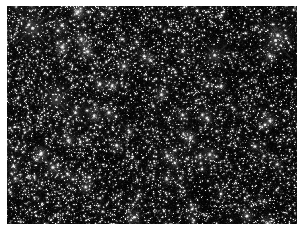

In [71]:
star_field = plt.imread('star_field_gray.png')
plt.imshow(star_field, cmap='gray')
plt.axis('off')

In [72]:
width, height = star_field.shape

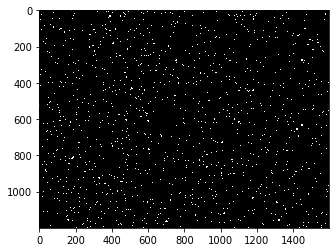

In [73]:
threshold = 0.9
star_field_img =  np.array(star_field, dtype=int)
for i in range(width):
    for j in range(height):
        pixel = star_field[i,j]
        if pixel <= threshold:
            star_field_img[i,j] = 0
        else:
            star_field_img[i,j] = 1
plt.imshow(star_field_img, cmap='gray')

In [74]:
conj(star_field_img)

'Number of components: 5089'